<a href="https://colab.research.google.com/github/kamrulkonok/UPC_ML_Project/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px
from scipy.stats import pearsonr
import plotly.graph_objects as go
from folium.plugins import HeatMap

In [11]:
df = pd.read_csv("/content/airbnb_data.csv", index_col =0)
df.head()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,day_type
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,...,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam,weekdays
1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,...,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam,weekdays
2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,...,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam,weekdays
3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,...,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam,weekdays
4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,...,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam,weekdays


## Features in the dataset

- `realSum` : Price of accommodation for two people for two nights (EUR)
- `room_type` : type of accommodation ['Private room', 'Entire home/apt', 'Shared room']
- `room_shared` : variable for shared rooms ['True', 'False']
- `room_private` : variable for private rooms ['True', 'False']
- `person_capacity` : maximum number of guests
- `host_is_superhost` : superhost status ['True', 'False']
- `multi` : if listing belongs to host with 2-4 offers [0, 1]
- `biz` : if listing belongs to host with > 4 offers [0, 1]
- `cleanliness_rating`
- `guest_satisfaction_overall` : overall rating of listing
- `bedrooms` : number of bedrooms (0 for studios)
- `dist` : distance from city centre (in km)
- `metro_dist` : distance from nearest metro station (in km)
- `attr_index` : attraction index of listing location
- `attr_index_norm` : normalized attraction index (0 - 100)
- `rest_index` : restaurant index of listing location
- `rest_index_norm` : normalized restaurant index (0 - 100)
- `lng` : longitude
- `lat` : latitude
- `city`
- `day_type` : weekend or weekday

## Shpae of the dataset = (51707, 22)

## The dataset does not contain any null values

## The dataset does not contain any duplicate values


In [12]:
# Display basic information about the dataset
data_info = {
    "columns": df.columns.tolist(),
    "shape": df.shape,
    "data_types": df.dtypes.to_dict(),
    "missing_values": df.isnull().sum().to_dict(),
    "duplicate_values": df.duplicated().sum(),
    "sample_data": df.head().to_dict(orient="list")
}

data_info

{'columns': ['realSum',
  'room_type',
  'room_shared',
  'room_private',
  'person_capacity',
  'host_is_superhost',
  'multi',
  'biz',
  'cleanliness_rating',
  'guest_satisfaction_overall',
  'bedrooms',
  'dist',
  'metro_dist',
  'attr_index',
  'attr_index_norm',
  'rest_index',
  'rest_index_norm',
  'lng',
  'lat',
  'city',
  'day_type'],
 'shape': (51707, 21),
 'data_types': {'realSum': dtype('float64'),
  'room_type': dtype('O'),
  'room_shared': dtype('bool'),
  'room_private': dtype('bool'),
  'person_capacity': dtype('float64'),
  'host_is_superhost': dtype('bool'),
  'multi': dtype('int64'),
  'biz': dtype('int64'),
  'cleanliness_rating': dtype('float64'),
  'guest_satisfaction_overall': dtype('float64'),
  'bedrooms': dtype('int64'),
  'dist': dtype('float64'),
  'metro_dist': dtype('float64'),
  'attr_index': dtype('float64'),
  'attr_index_norm': dtype('float64'),
  'rest_index': dtype('float64'),
  'rest_index_norm': dtype('float64'),
  'lng': dtype('float64'),
  '

* `realSum (Price)`: The average price is around 279.88 EUR with a standard deviation of 327.95 EUR.
* `person_capacity`: Most listings can accommodate around 2 to 4 guests, with a mean capacity of approximately 3.16 guests.
* `cleanliness_rating`: The average cleanliness rating is 9.39, indicating generally high cleanliness.
* `guest_satisfaction_overall`: The overall satisfaction rating is high, with an average of 92.63.
* `dist (Distance from city center)`: The mean distance is approximately 3.19 km.
* `metro_dist`: The mean distance to the nearest metro station is around 0.68 km.
* `attr_index and rest_index`: These indices show a wide range of
values, reflecting varying levels of attraction and restaurant quality around the listings.



In [13]:
description = df.describe()

# Display the description
print("Descriptive statistics of the dataset:")
print(description)

Descriptive statistics of the dataset:
            realSum  person_capacity         multi           biz  \
count  51707.000000     51707.000000  51707.000000  51707.000000   
mean     279.879591         3.161661      0.291353      0.350204   
std      327.948386         1.298545      0.454390      0.477038   
min       34.779339         2.000000      0.000000      0.000000   
25%      148.752174         2.000000      0.000000      0.000000   
50%      211.343089         3.000000      0.000000      0.000000   
75%      319.694287         4.000000      1.000000      1.000000   
max    18545.450285         6.000000      1.000000      1.000000   

       cleanliness_rating  guest_satisfaction_overall     bedrooms  \
count        51707.000000                51707.000000  51707.00000   
mean             9.390624                   92.628232      1.15876   
std              0.954868                    8.945531      0.62741   
min              2.000000                   20.000000      0.00000  

In [17]:
# Describe the categorical features and include only the required statistics
categorical_description = df.describe(include=['object'])

# Display only count, unique, top, and freq for categorical features
categorical_summary = categorical_description.loc[['count', 'unique', 'top', 'freq']]

print("Descriptive statistics of the categorical features:")
print(categorical_summary)

Descriptive statistics of the categorical features:
              room_type    city  day_type
count             51707   51707     51707
unique                3      10         2
top     Entire home/apt  london  weekends
freq              32648    9993     26207


# Plotting histogram for numerical features

* `realSum`: The price distribution is right-skewed, with many listings priced lower and fewer listings at higher prices.
* `person_capacity`: Most listings accommodate 2 to 4 people.
* `cleanliness_rating`: High cleanliness ratings are common, with a peak at the highest value.
* `guest_satisfaction_overall`: The overall satisfaction ratings are skewed towards higher values.
* `dist`: The distance from the city center varies, with a notable number of listings located closer to the center.
* `metro_dist`: Most listings are located close to metro stations.
* `attr_index and rest_index`: Both indices show a diverse range of values, indicating varying levels of attraction and restaurant quality near the listings.

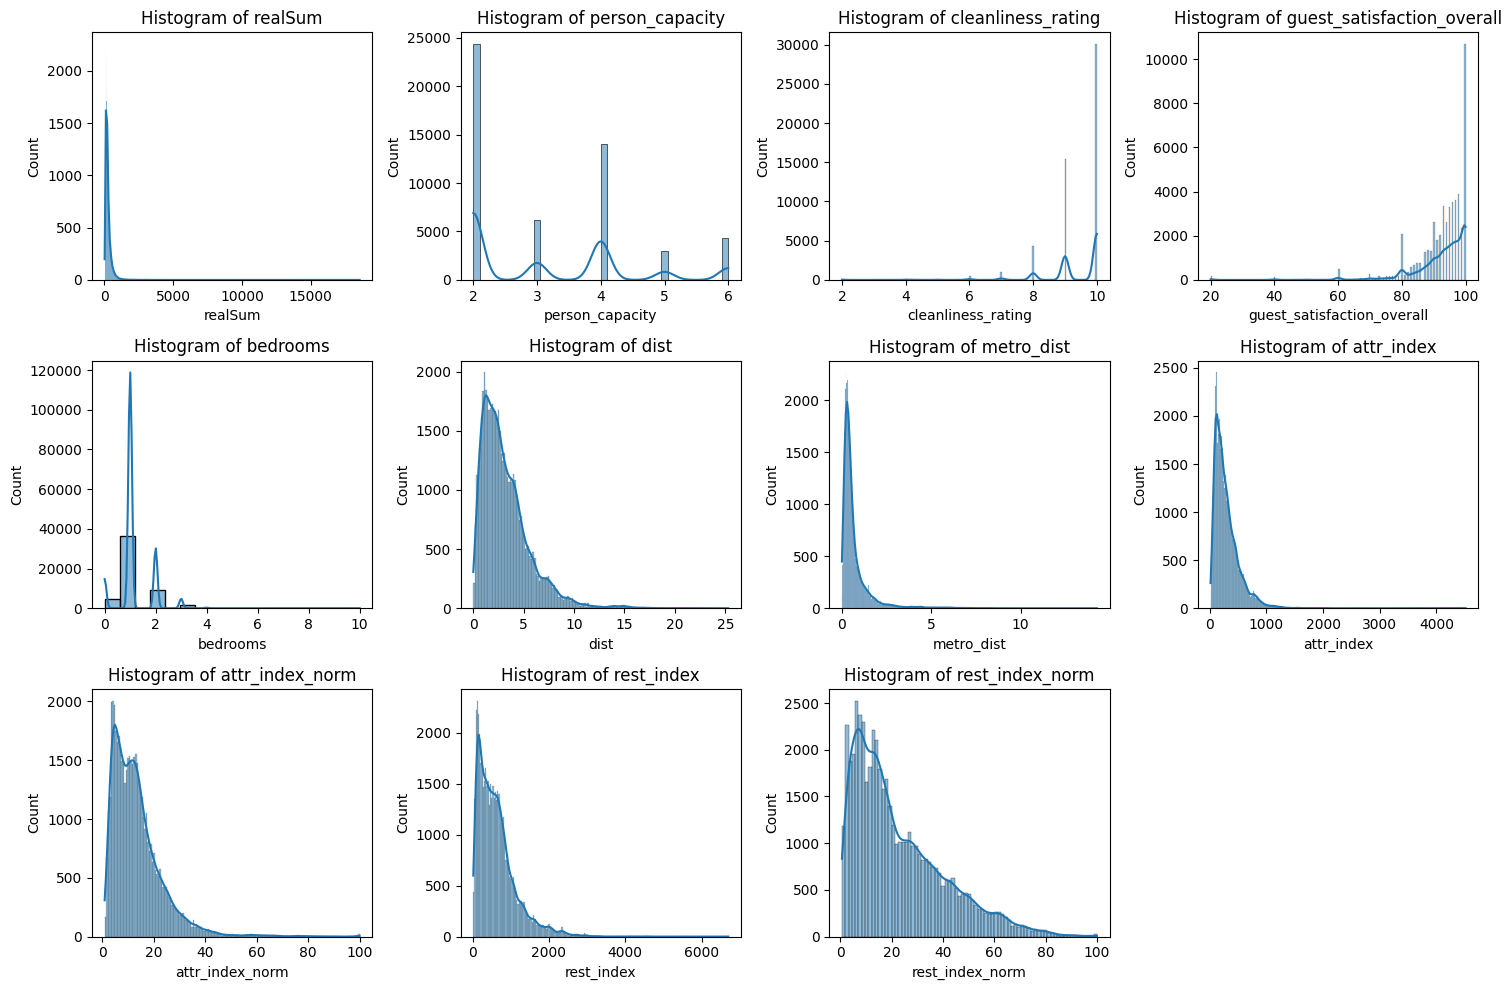

In [ ]:
plt.figure(figsize=(15, 10))

# List of numerical columns to plot
numerical_columns = ["realSum", "person_capacity", "cleanliness_rating",
                     "guest_satisfaction_overall", "bedrooms", "dist",
                     "metro_dist", "attr_index", "attr_index_norm",
                     "rest_index", "rest_index_norm"]

for i, column in enumerate(numerical_columns, start=1):
    plt.subplot(3, 4, i)
    sns.histplot(df[column], kde=True)
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

# Bar Plots for Categorical columns
* `room_type`: Most listings are either 'Private room' or 'Entire home/apt', with fewer 'Shared room' listings.
* `room_shared`: A significant majority of listings are not shared.
* `room_private`: Most listings are private.
* `host_is_superhost`: The number of superhost listings is fewer compared to non-superhosts.
* `multi`: Listings from hosts with 2-4 offers are fewer than those from hosts with fewer or more offers.
* `biz`: Listings from hosts with more than 4 offers are fewer than those from hosts with fewer offers.
* `city`: The dataset covers multiple cities, with varying numbers of listings in each city.
* `day_type`: The dataset includes listings for both weekdays and weekends, with a relatively balanced distribution.

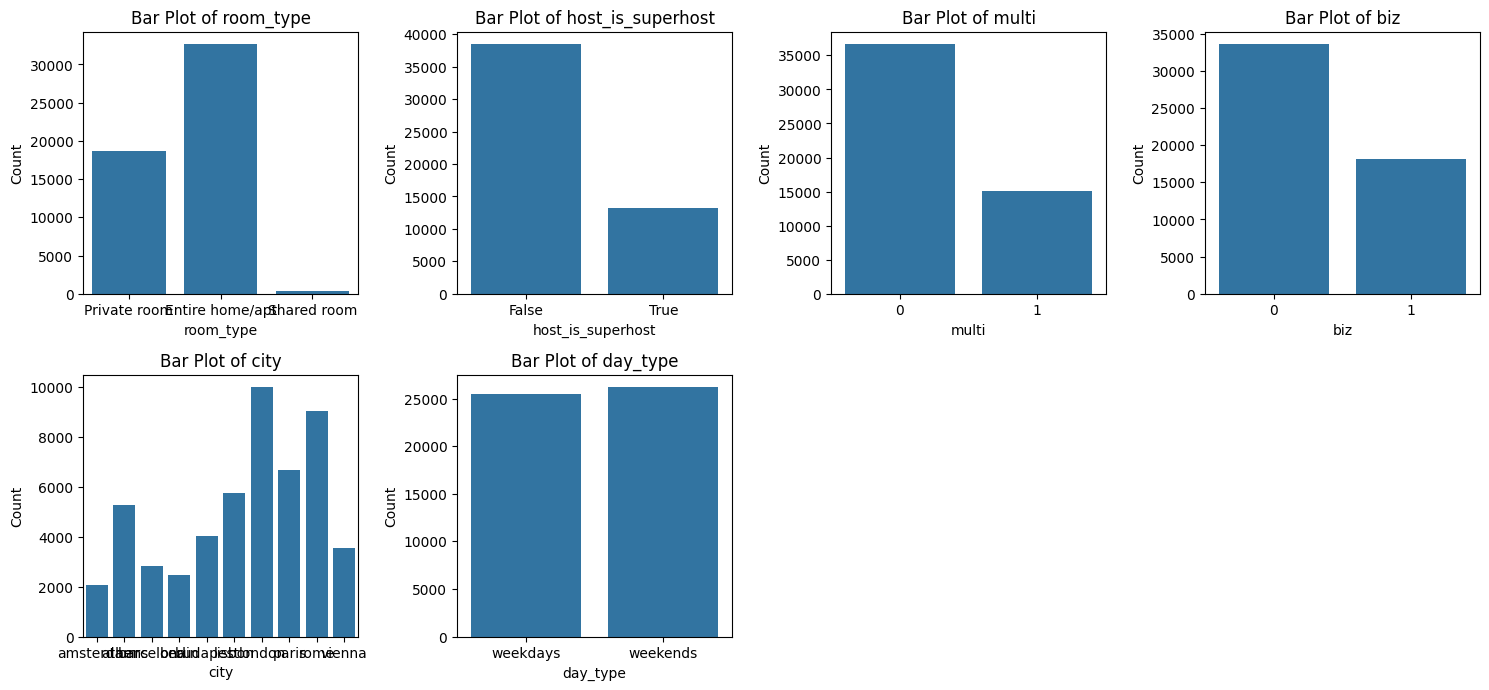

In [18]:
#List of categorical columns
categorical_columns = ["room_type", "host_is_superhost", "multi", "biz", "city", "day_type"]

plt.figure(figsize=(15, 10))

for i, column in enumerate(categorical_columns, start=1):
    plt.subplot(3, 4, i)
    sns.countplot(x=df[column])
    plt.title(f"Bar Plot of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

# Correlation Matrix Analysis
The heatmap of the correlation matrix provides insights into the relationships between numerical features. Here are some key observations:

* `realSum (Price)`: Positively correlated with person_capacity (0.35), indicating higher prices for listings that accommodate more guests.
Negatively correlated with dist (-0.04) and metro_dist (-0.06), indicating that listings closer to the city center and metro stations tend to be more expensive.

* `cleanliness_rating and guest_satisfaction_overall`: These are strongly positively correlated (0.71), indicating that cleaner listings tend to have higher overall satisfaction ratings.

* `attr_index and rest_index`: Strongly positively correlated with their normalized versions (attr_index_norm and rest_index_norm), as expected.

* `dist and metro_dist`: Positively correlated (0.56), indicating that listings further from the city center are also likely to be further from metro stations.

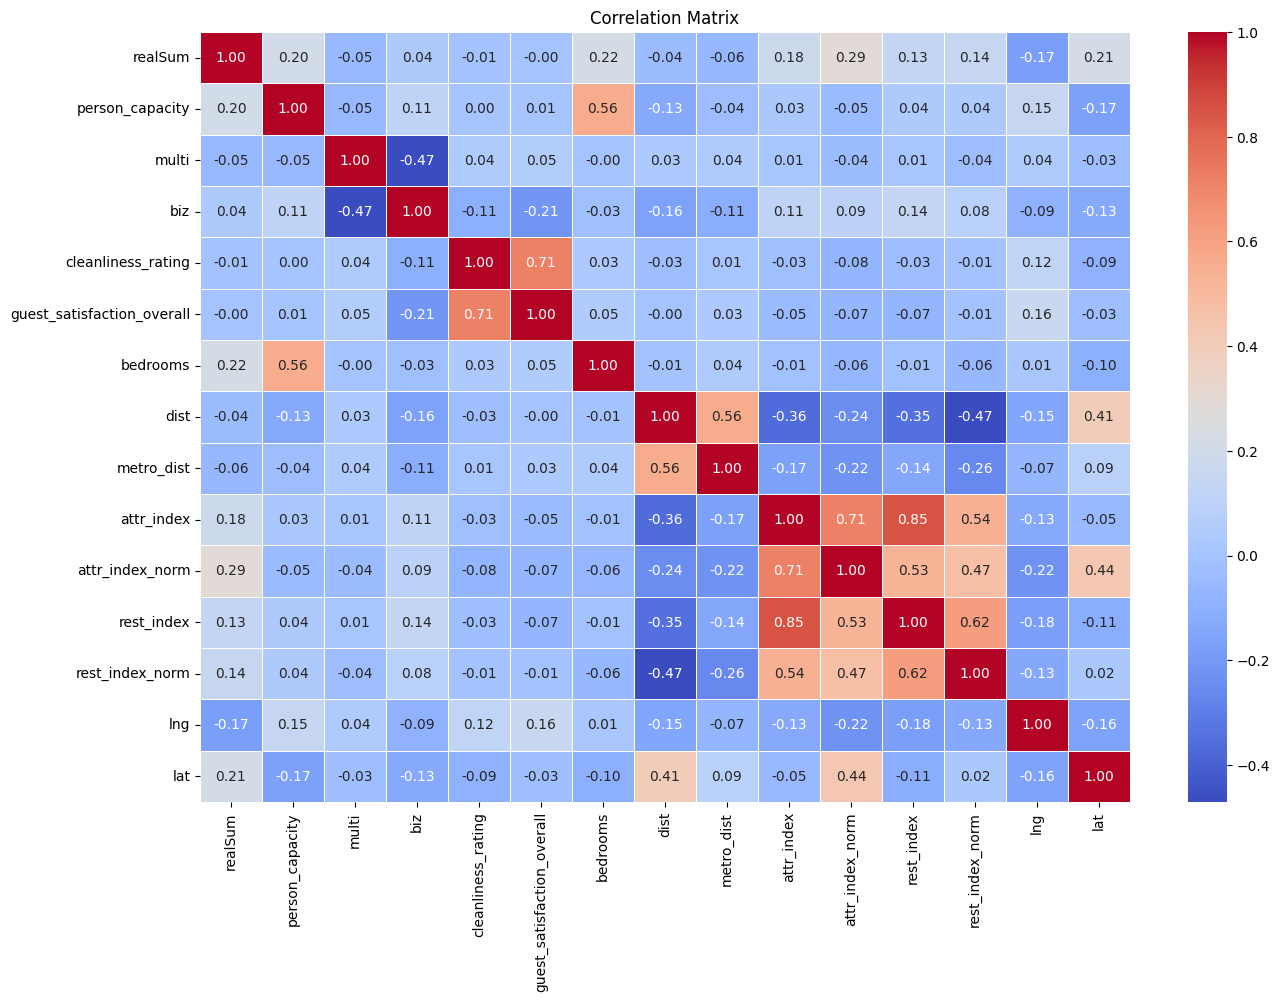

In [ ]:
# Select only numerical features
numerical_features = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numerical_features.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Plotting a bar chart to compare prices in weekends and weekdays by city

It is clear from the bar chart that the average prices in every cities is compartively higher on weekends except "Athens and Paris".

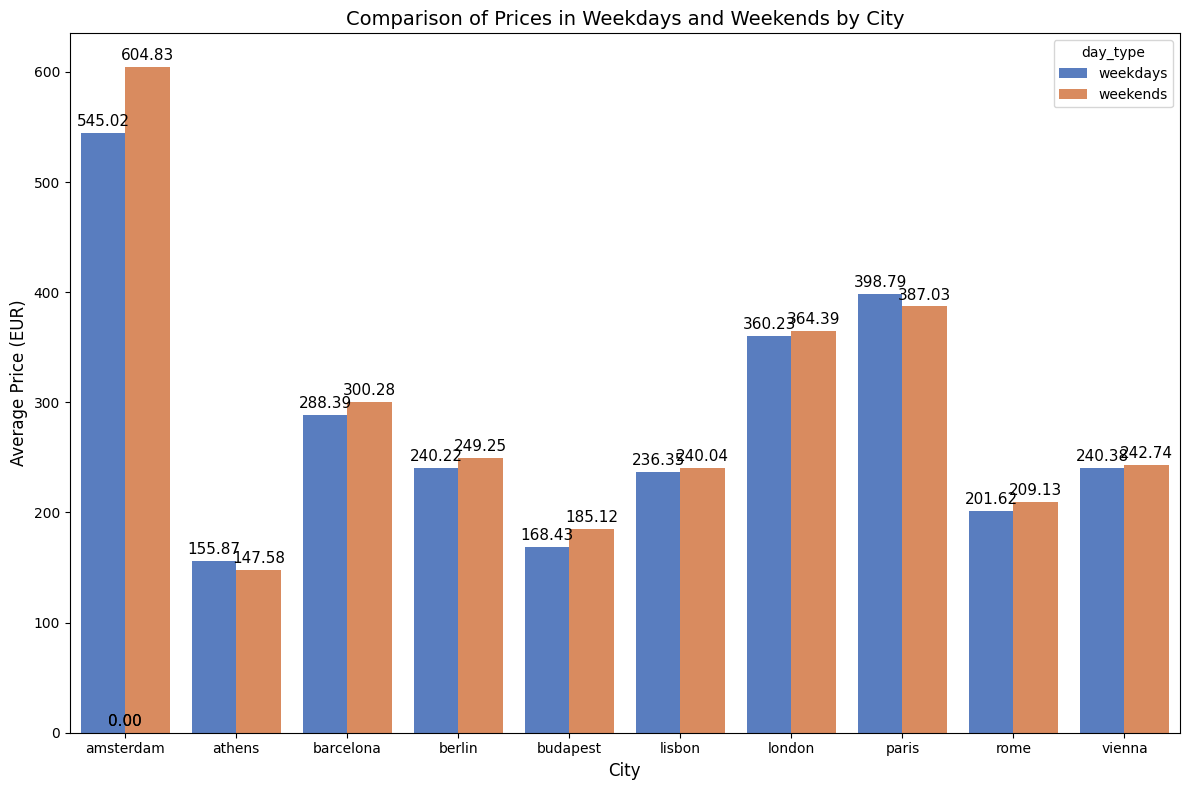

In [ ]:
# Group by city and day_type and calculate the mean of realSum
price_comparison = df.groupby(["city", "day_type"])["realSum"].mean().reset_index()

# Plotting the bar chart using seaborn
plt.figure(figsize=(12, 8))
barplot = sns.barplot(data=price_comparison, x="city", y="realSum", hue="day_type", palette="muted")

# Adding labels and title
barplot.set_xlabel('City', fontsize=12)
barplot.set_ylabel('Average Price (EUR)', fontsize=12)
barplot.set_title('Comparison of Prices in Weekdays and Weekends by City', fontsize=14)

# Adding text labels on top of the bars
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='baseline',
                     fontsize=11, color='black', xytext=(0, 5),
                     textcoords='offset points')

# Display the plot
plt.tight_layout()
plt.show()

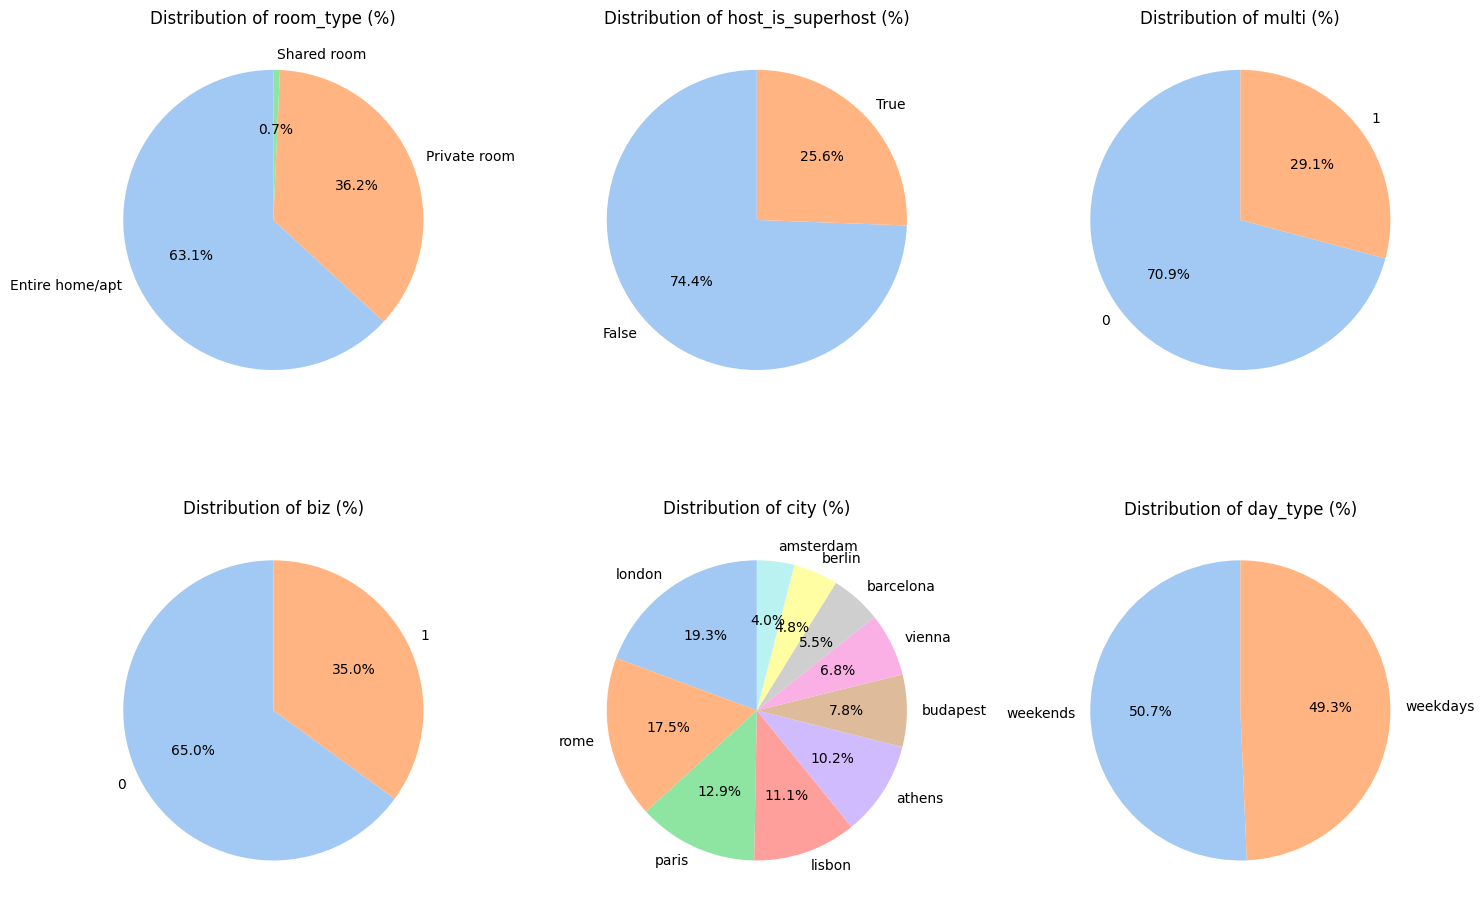

In [ ]:
# List of categorical columns
categorical_columns = ["room_type", "host_is_superhost", "multi", "biz", "city", "day_type"]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for ax, column in zip(axes.flatten(), categorical_columns):

    category_distribution = df[column].value_counts(normalize=True) * 100

    ax.pie(category_distribution,
           labels=category_distribution.index,
           autopct='%1.1f%%',
           startangle=90,
           colors=sns.color_palette("pastel"))

    ax.set_title(f"Distribution of {column} (%)")

plt.tight_layout()
plt.show()


The bar chart below shows the distribution of Airbnb listings across different cities, along with the percentage of superhosts in each city. It reveals that cities like London and Rome have significantly more listings compared to smaller cities like Amsterdam and Berlin. Rome and Athens lead with the highest proportion of superhosts, while Paris and London have only about 15% superhosts.

Airbnb defines a superhost as "the top-rated, most experienced host on Airbnb, committed to providing you with outstanding hospitality." To achieve this status, hosts must meet specific criteria set by Airbnb.

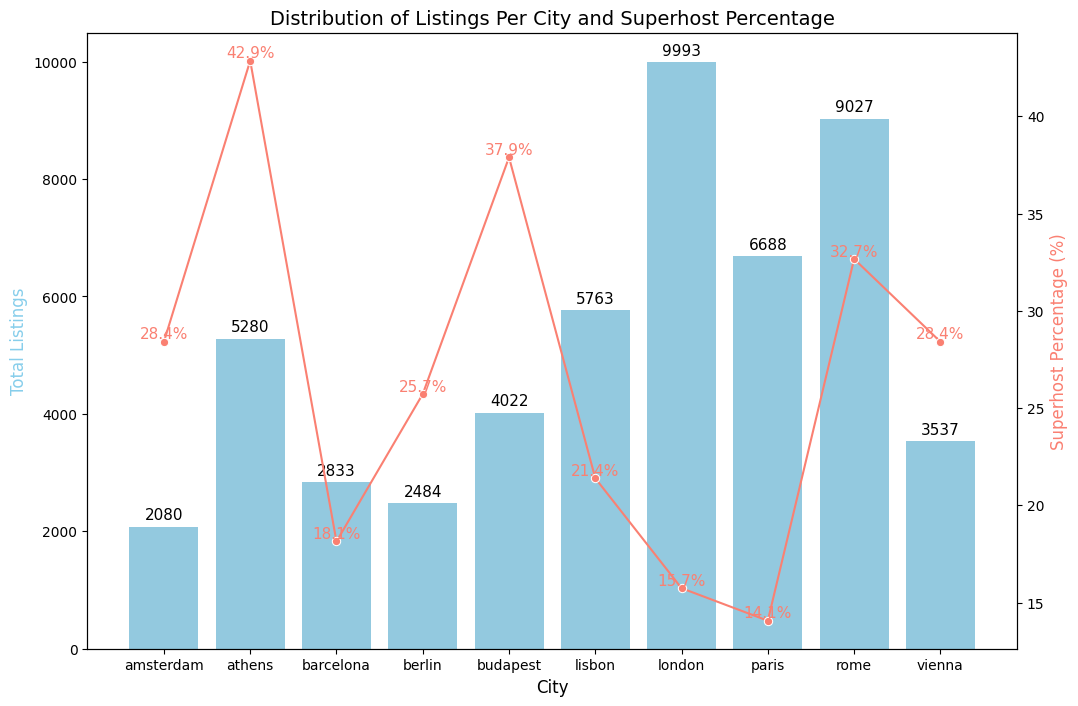

In [ ]:
# Group by city and count the number of listings
listings_per_city = df.groupby("city").size().reset_index(name='listings_count')

# Group by city and calculate the percentage of superhosts
superhost_per_city = df.groupby("city")["host_is_superhost"].mean().reset_index()
superhost_per_city["superhost_percentage"] = superhost_per_city["host_is_superhost"] * 100

# Merge the two DataFrames on 'city'
city_listing_superhost = listings_per_city.merge(superhost_per_city, on="city")

# Plotting the data using seaborn and matplotlib
fig, ax1 = plt.subplots(figsize=(12, 8))

# Bar plot for total listings
sns.barplot(data=city_listing_superhost, x="city", y="listings_count", ax=ax1, color='skyblue')

# Adding labels and title
ax1.set_xlabel('City', fontsize=12)
ax1.set_ylabel('Total Listings', fontsize=12, color='skyblue')
ax1.set_title('Distribution of Listings Per City and Superhost Percentage', fontsize=14)

# Adding text labels for the total listings
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='baseline',
                 fontsize=11, color='black', xytext=(0, 5),
                 textcoords='offset points')

# Creating a second y-axis for the superhost percentage
ax2 = ax1.twinx()
ax2.set_ylabel('Superhost Percentage (%)', fontsize=12, color='salmon')

# Line plot for superhost percentage
sns.lineplot(data=city_listing_superhost, x="city", y="superhost_percentage", ax=ax2, marker='o', color='salmon')

# Adding text labels for the superhost percentage
for x, y in zip(city_listing_superhost['city'], city_listing_superhost['superhost_percentage']):
    ax2.text(x, y, f'{y:.1f}%', color='salmon', ha='center', va='bottom', fontsize=11)

plt.show()


# Room types analysis by cities

[Text(-15.027777777777784, 0.5, 'City'), (0.0, 1.0)]

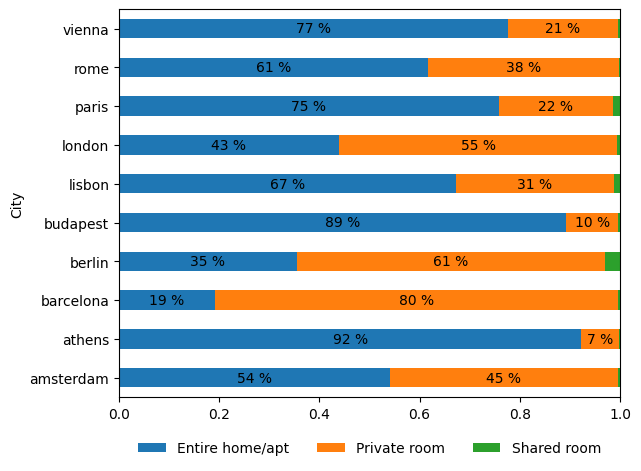

In [ ]:
city_roomtype = df.groupby("city")["room_type"].value_counts(normalize=True).unstack("room_type")
crplot = city_roomtype.plot.barh(stacked=True)

plt.legend(
        bbox_to_anchor=(0.5, -0.1),
        loc="upper center",
        borderaxespad=0,
        frameon=False,
        ncol=4,)
for percentage, row in city_roomtype.reset_index(drop=True).iterrows():
    cumulative = 0
    for element in row:
        if element > 0.05:
            plt.text(
                cumulative + element / 2,
                percentage,
                f"{int(element * 100)} %",
                va="center",
                ha="center",
            )
        cumulative += element
plt.tight_layout()

crplot.set(ylabel="City", xlim=(0.0,1.0))

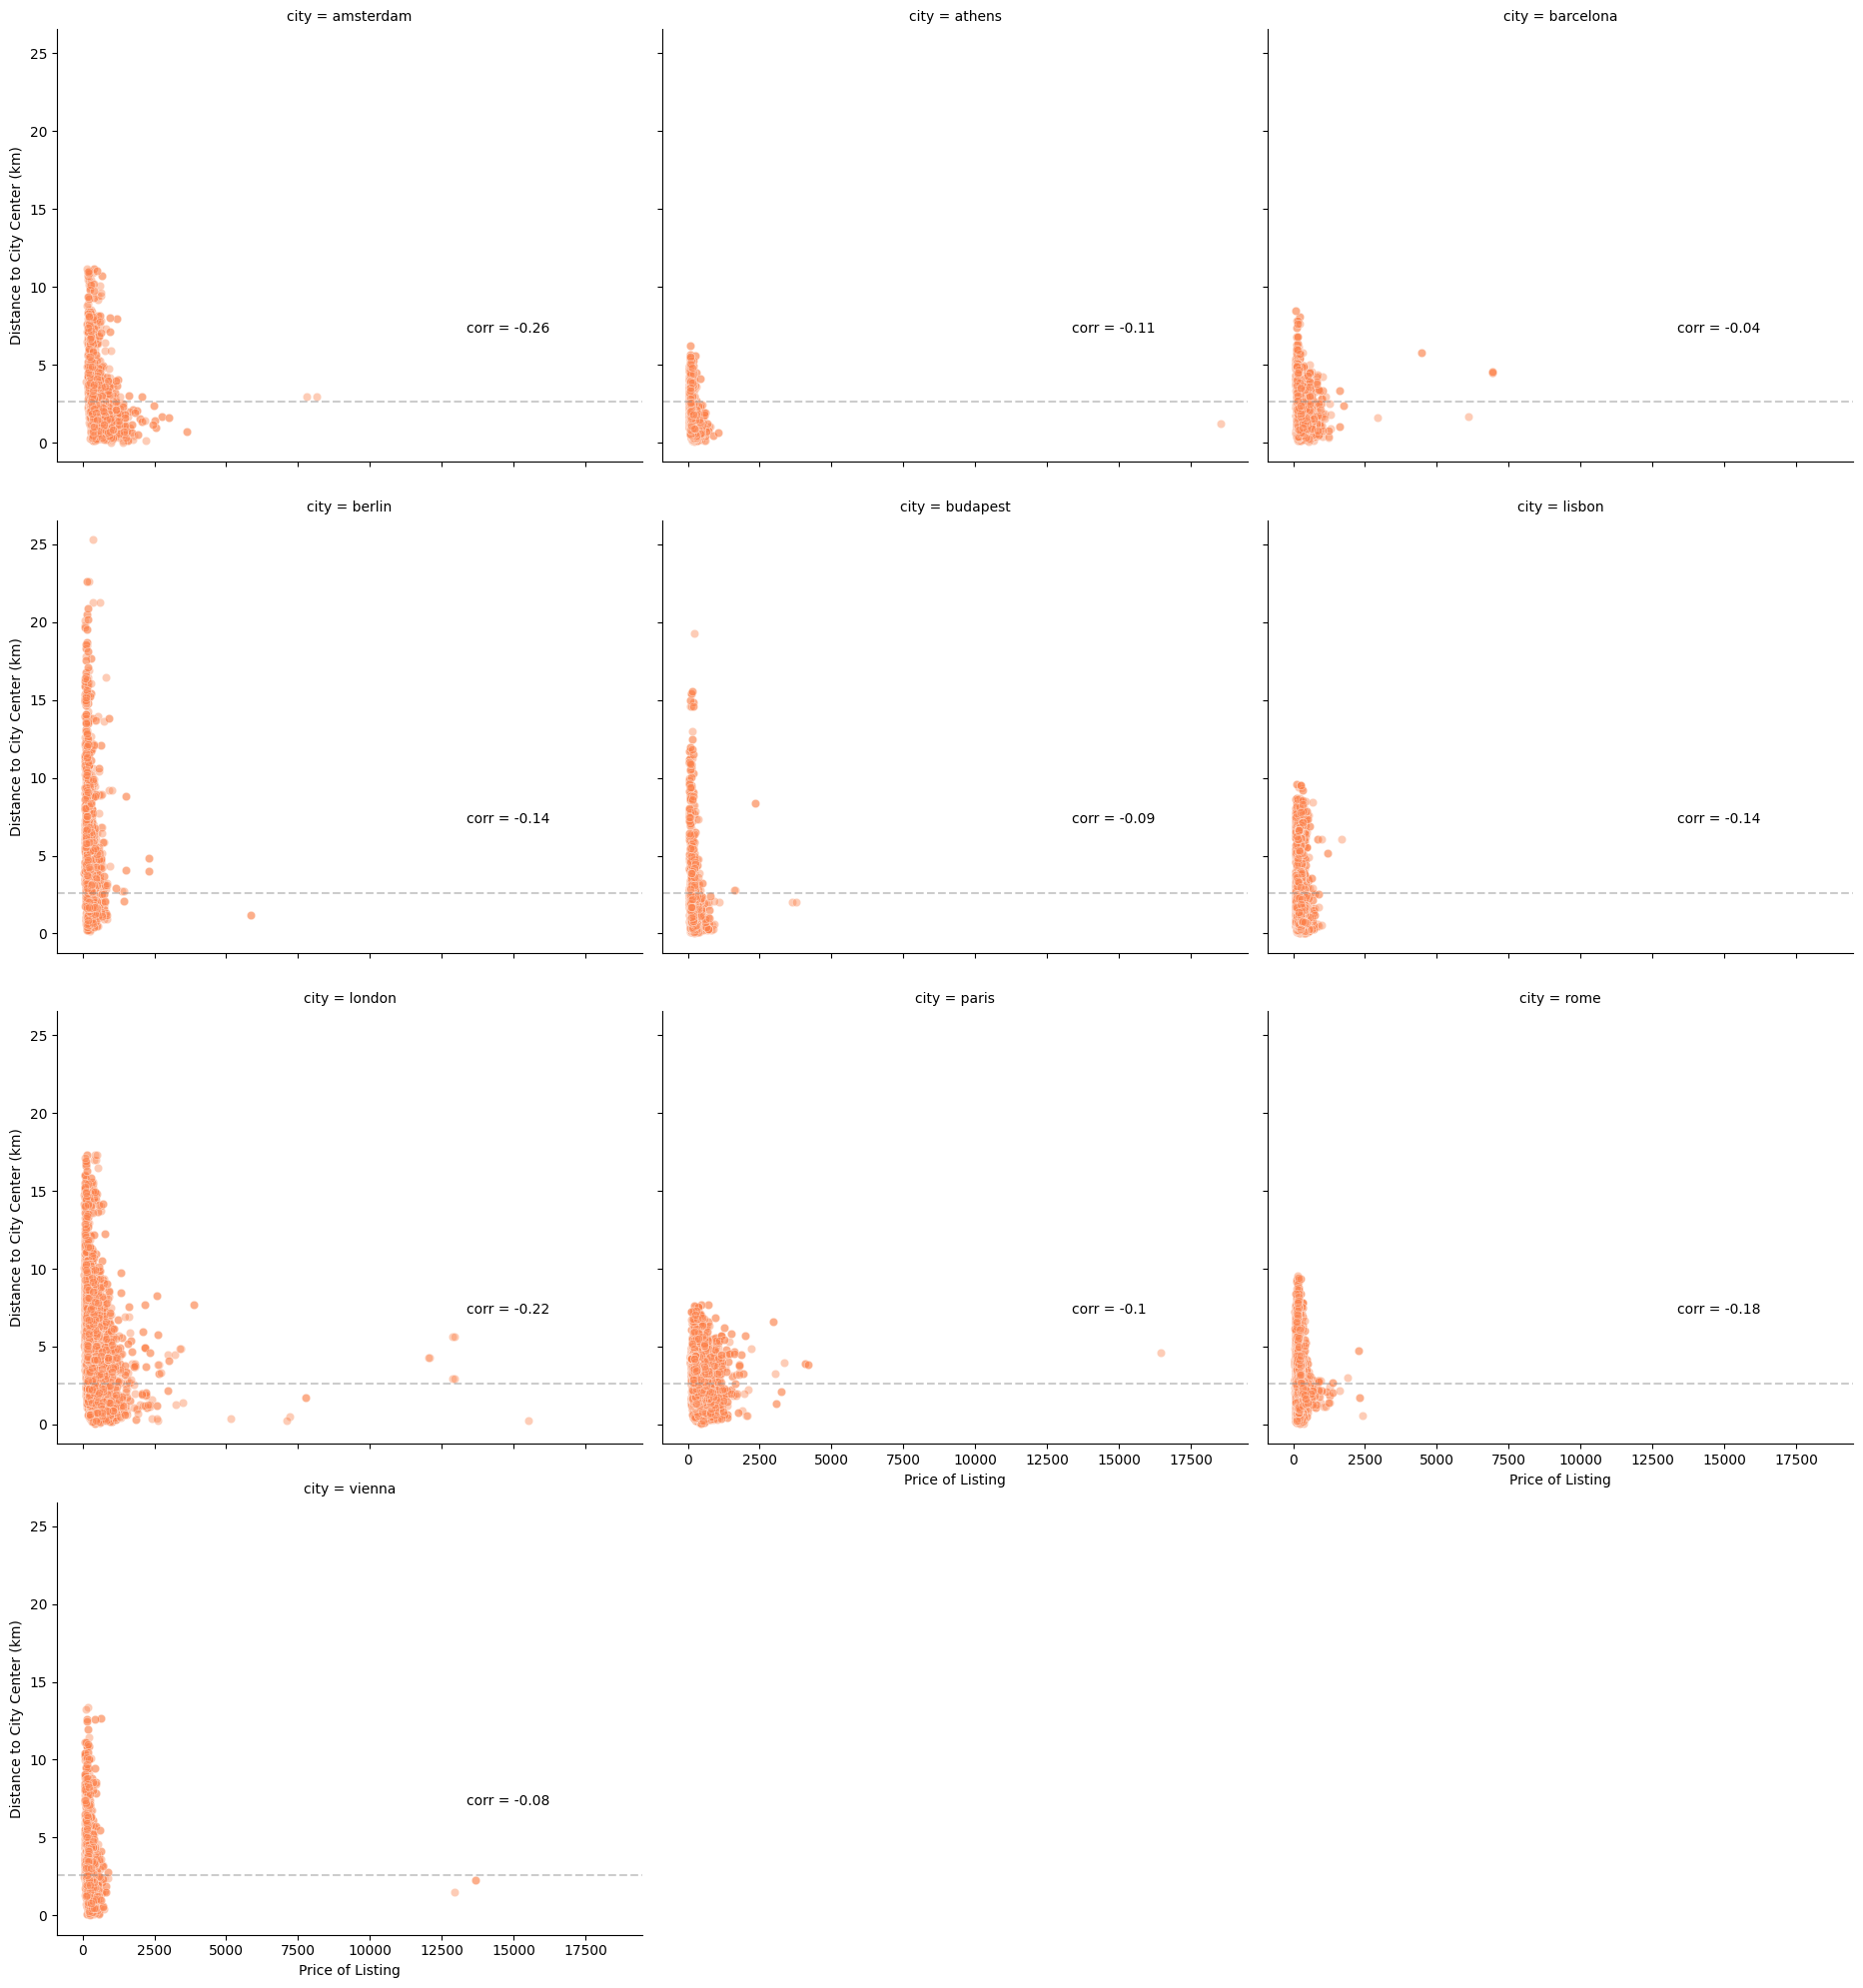

In [ ]:
grid = sns.FacetGrid(df, col='city', col_wrap=3, height=5, aspect=1.25)

grid.map(sns.scatterplot, "realSum", "dist", color='#FC814A', alpha=.4)

grid.refline(y=df["dist"].median(), alpha=.4)

grid.set_axis_labels("Price of Listing", "Distance to City Center (km)")

def annotate(data, **kws):
    corr, _ = pearsonr(data["realSum"], data["dist"])
    ax = plt.gca()
    ax.text(.7, .3, f"corr = {round(corr, 2)}", transform=ax.transAxes)

grid.map_dataframe(annotate)

plt.show()

# Price Analysis
* `Price vs Room Type`: Entire home/apartments are generally the most expensive, followed by private rooms. Shared rooms tend to be the least expensive.
* `Price vs Superhost Status`: Listings from superhosts tend to have higher prices compared to non-superhosts. This suggests that the superhost status may add perceived value to the listings.
* `Price vs City`: There is a noticeable variation in prices across different cities. Some cities have generally higher prices compared to others, indicating location-specific pricing trends.
* `Price vs Day Type`: Prices for weekends are slightly higher on average compared to weekdays, indicating a possible increase in demand during weekends.

<ipython-input-13-8ed106537cf5>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, horizontalalignment='right')
<ipython-input-13-8ed106537cf5>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(['False', 'True'], rotation=45, horizontalalignment='right')
<ipython-input-13-8ed106537cf5>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45, horizontalalignment='right')
<ipython-input-13-8ed106537cf5>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[3].set_xticklabels(['Weekdays', 'Weekends'], rotation=45, horizontalalignment='right')


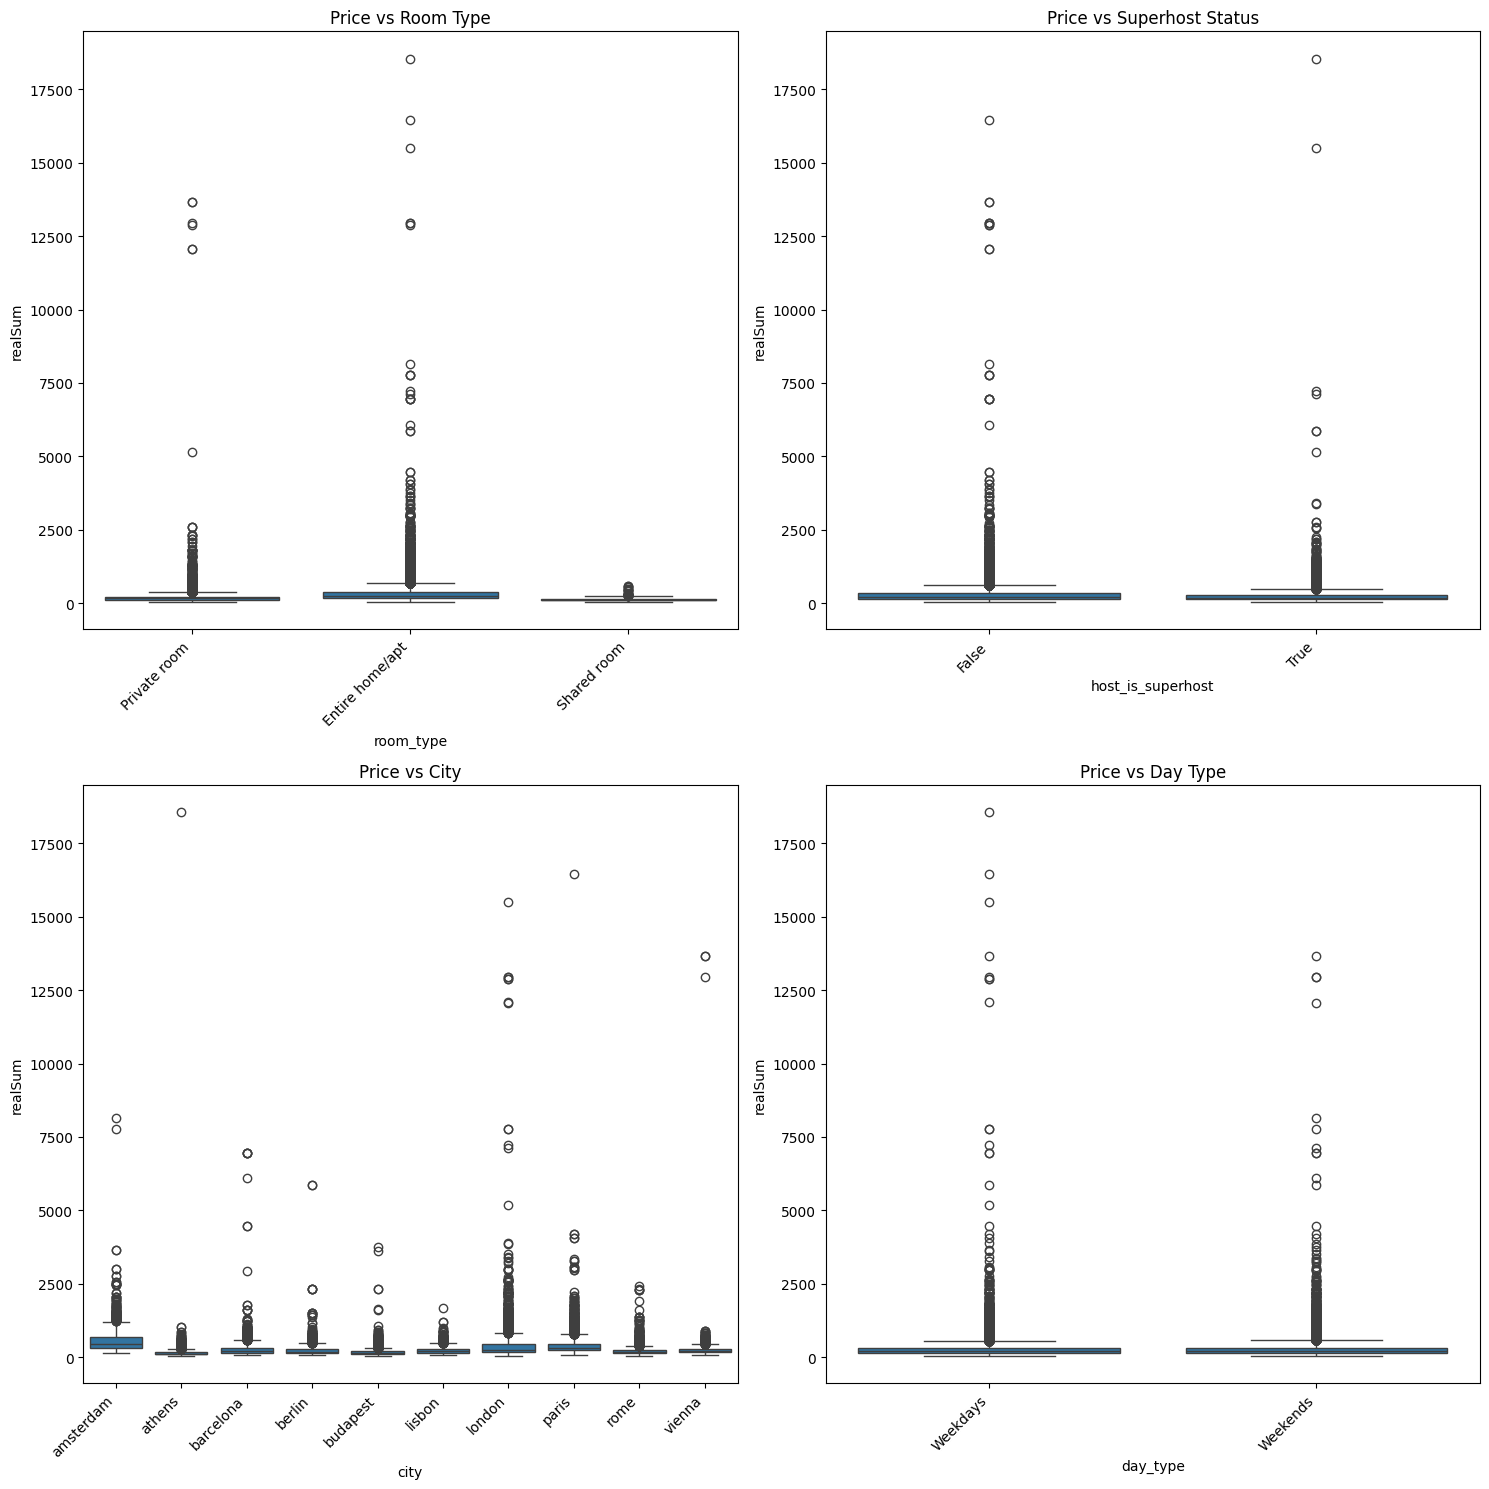

In [ ]:
# Price analysis with categorical features
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
axes = axes.flatten()

# Price vs room_type
sns.boxplot(data=df, x='room_type', y='realSum', ax=axes[0])
axes[0].set_title('Price vs Room Type')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, horizontalalignment='right')

# Price vs host_is_superhost
sns.boxplot(data=df, x='host_is_superhost', y='realSum', ax=axes[1])
axes[1].set_title('Price vs Superhost Status')
axes[1].set_xticklabels(['False', 'True'], rotation=45, horizontalalignment='right')

# Price vs city
sns.boxplot(data=df, x='city', y='realSum', ax=axes[2])
axes[2].set_title('Price vs City')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45, horizontalalignment='right')

# Price vs day_type
sns.boxplot(data=df, x='day_type', y='realSum', ax=axes[3])
axes[3].set_title('Price vs Day Type')
axes[3].set_xticklabels(['Weekdays', 'Weekends'], rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()

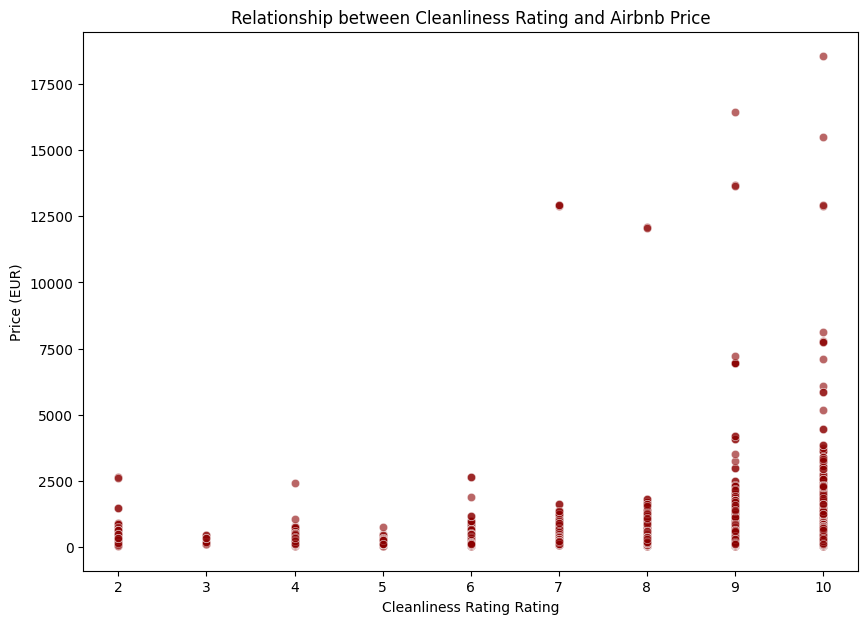

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=df["cleanliness_rating"], y=df["realSum"], alpha=0.6, color='darkred')
plt.title("Relationship between Cleanliness Rating and Airbnb Price")
plt.xlabel("Cleanliness Rating Rating")
plt.ylabel("Price (EUR)")
plt.show()

It is clear that the prices on weekdays and weekends are pretty similar, but it is interesting to see the potential outliers in both.

# Density of Airbnb listing based on distance from each city center

Most Airbnb houses are within 10 km of city centers. In cities where population and attractions are concentrated around the city center, like Lisbon and Athens, we can find that most Airbnb listings are close to the city center. In decentralized and dispersed cities like Berlin and Amsterdam, listings are more equally spread out from the city center. In cities that have several centers like Rome and Paris, you may find more listings around these centers compared to other places.

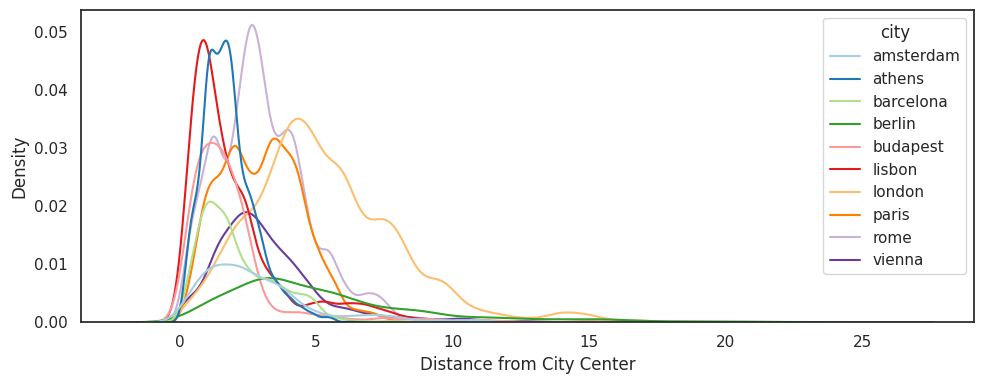

In [ ]:
sns.set(style="white")
plt.figure(figsize=(10,4))
g = sns.kdeplot(data=df, x="dist", hue="city", palette="Paired")
g.set(xlabel = "Distance from City Center")

plt.tight_layout()

plt.show()

# Outlier Analysis

For the `realSum` feature, which represents the price, there is a significant number of high-value outliers, indicating that while most prices are clustered at lower values, there are luxury accommodations priced much higher. The `cleanliness_rating` boxplot shows high ratings for the majority of listings, with a few lower outliers suggesting some properties did not meet cleanliness expectations. The `dist` (distance from city center) and `metro_dist` (distance from the nearest metro station) features both exhibit a right-skewed distribution with several outliers at greater distances, reflecting the presence of listings further from central locations and transport hubs. This could indicate a preference for more centrally located properties.
`Guest_satisfaction_overall` generally shows high satisfaction scores, with a few outliers on the lower end, emphasizing that most guests are very satisfied, but some properties have room for improvement. The `rest_index_norm` and `attr_index_norm` features, representing normalized restaurant and attraction indices, both display a wide range of values with numerous outliers,
particularly on the higher end. This suggests variability in the accessibility to restaurants and attractions among different listings, with some properties being exceptionally well-located.

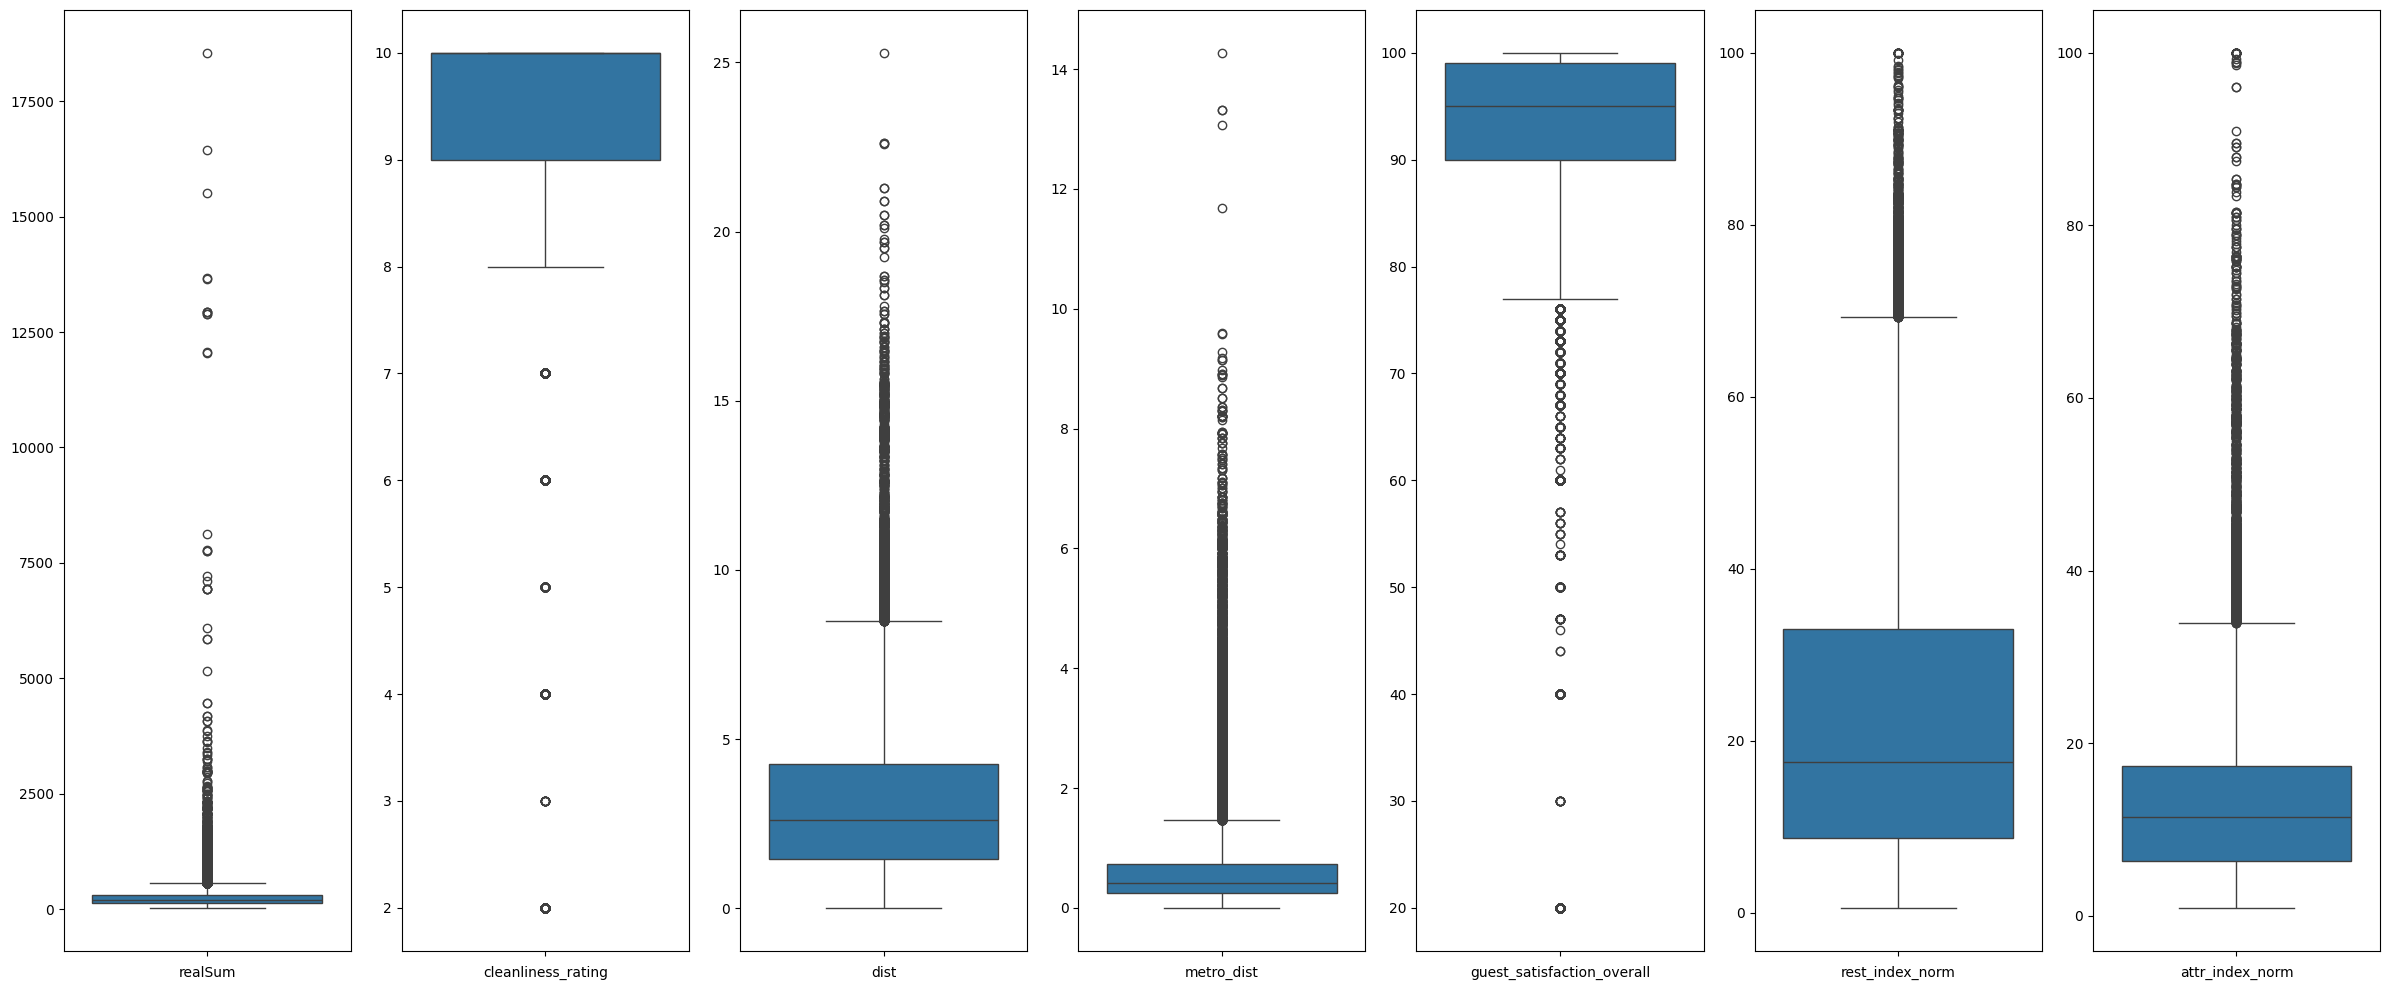

In [22]:
# numerical features to plot
features_to_plot = ['realSum', 'cleanliness_rating', 'dist', 'metro_dist', 'guest_satisfaction_overall', 'rest_index_norm', 'attr_index_norm']
plt.figure(figsize=(24, 10))

for i, feature in enumerate(features_to_plot):
    plt.subplot(1, len(features_to_plot), i + 1)
    sns.boxplot(y=df[feature])
    plt.xlabel(feature)
    plt.ylabel('')

plt.tight_layout()
plt.show()

# Spatial Analysis



The city-based map provides detailed insights into key business metrics for various cities. Each city marker shows:

* `Average Price (realSum)`: The mean cost of listings in the city.
* `Average Capacity`: The mean number of persons that listings can accommodate.
* `Average Cleanliness Rating`: The average cleanliness rating given by guests.
* `Average Attraction Index`: A measure of the city's attractions.
* `Average Restaurant Index`: A measure of the city's dining options.



---


This map allows businesses to compare cities based on these metrics and identify which cities have higher or lower averages. For example, cities with higher average prices might indicate areas with higher demand or more luxurious accommodations. Conversely, cities with lower cleanliness ratings may require targeted improvements to enhance guest satisfaction.

In [ ]:
lat_center = df['lat'].mean()
lon_center = df['lng'].mean()

# Group the data by city and calculate the average of relevant columns
city_data = df.groupby('city').agg({
    'realSum': 'mean',
    'person_capacity': 'mean',
    'cleanliness_rating': 'mean',
    'attr_index': 'mean',
    'rest_index': 'mean',
    'lat': 'mean',
    'lng': 'mean'
}).reset_index()

m = folium.Map(location=[lat_center, lon_center], zoom_start=6)
colormap = folium.LinearColormap(colors=['green', 'yellow', 'red'],
                                 vmin=city_data['realSum'].min(), vmax=city_data['realSum'].max())

for idx, row in city_data.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lng']],
        radius=10,
        color=colormap(row['realSum']),
        fill=True,
        fill_color=colormap(row['realSum']),
        fill_opacity=0.7,
        popup=folium.Popup(f"City: {row['city']}<br>"
                           f"Avg Price: {row['realSum']:.2f}<br>"
                           f"Avg Capacity: {row['person_capacity']:.2f}<br>"
                           f"Avg Cleanliness: {row['cleanliness_rating']:.2f}<br>"
                           f"Avg Attr Index: {row['attr_index']:.2f}<br>"
                           f"Avg Rest Index: {row['rest_index']:.2f}", max_width=200)
    ).add_to(m)

m.add_child(colormap)

The density heatmap illustrates the concentration of Airbnb listings across different regions. Areas with higher densities appear more prominently on the map, indicating clusters of listings. This visualization helps identify:


---


`High-Density Areas`: Regions with a large number of listings, which could indicate popular tourist destinations or central urban areas. Businesses can focus marketing efforts and service improvements in these areas to capitalize on high demand.

`Low-Density Areas`: Regions with fewer listings, which may present opportunities for market expansion or indicate less popular areas.

In [ ]:
m_heatmap = folium.Map(location=[lat_center, lon_center], zoom_start=6)

# Prepare the data for the heatmap
heat_data = [[row['lat'], row['lng']] for idx, row in df.iterrows()]
HeatMap(heat_data).add_to(m_heatmap)

m_heatmap